
<h1 style="font-size:20pt">END TO END SENTIMENT ANALYSIS | DATA SCRABBING WITH SELENIUM </h1><br/>

In this project I obtained data from https://www.airlinequality.com/ via scrabbing with Selenium.Then, From Turkish airlines reviews, each pages include 100 comment I scarb and draw 25 pages and get almost 2400 reviews. In these reviews I manipulate related section and draw necessary information.
and I prepared raw data for modelling. Following this, I made calssification sentiment analysis with Vader Sentiment and Hugging face model ("distilbert-base-uncased-finetuned-sst-2-english") and compare with customer recommends by classification model. Finally I made emotion analysis with Hugging face model("j-hartmann/emotion-english-distilroberta-base")

## Table of Contents:

* [1. IMPORT REQUIRED PACKAGES](#import-packages-1)
* [2. WEB SCRABING WITH SELENIUM](#web-scarbing-with-selenium-2)
* [3. CREATING DATAFRAME FROM SCRABBED DATA](#create-dataframe-from-scrabbed-data-3)
* [4. SENTIMENT ANALYSIS WITH VADER AND CLASSIFICATION MODEL TO EVALUATE](#VADER)
* [5. SENTIMENTAL ANALYSIS WITH BERT AND  CLASSIFICATION MODELS TO EVALUATE](#BERT)
* [6. EMOTION ANALYSIS WITH DISTILBERT](#EMOTION)
* [7. REFERENCES](#REFERENCES)

### 1. IMPORT REQUIRED PACKAGES <a class="anchor" id="import-packages-1"></a>

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier
import pandas as pd
import plotly.express as px
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import plotly.express as px
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
%matplotlib inline 
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm


### 2. WEB SCRABING WITH SELENIUM <a class="anchor" id="web-scarbing-with-selenium-2"></a>

In this part I gave order with Selenium command first of all it went the web site and then review part and find T letter for Turkish airlines then collected related data from review table that each of them belongs to a dinstinct customers. This process can be last long so I use "element_to_be_clickable" as it needs.

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.airlinequality.com/"
driver.get(url)
driver.maximize_window()
wait = WebDriverWait(driver, 10)
find_az = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="tab-579790"]/div/div/a[2]')))
driver.execute_script("arguments[0].click();", find_az)                       

wait = WebDriverWait(driver, 10)
element = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[1]/div/div/section[2]/div/section/ul/li[20]/a')))
driver.execute_script("arguments[0].click();", element)

wait = WebDriverWait(driver, 10)
find_turkishairline=wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[1]/div/div/section[2]/div/section/div/div[20]/div[2]/ul[2]/li[8]/a')))                     
driver.execute_script("arguments[0].click();", find_turkishairline)


wait = WebDriverWait(driver, 10)
find_100=wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div/div/div/section[3]/div[1]/article/div[1]/div[2]/form/ul/li[4]/label')))                     
driver.execute_script("arguments[0].click();", find_100)


In [ ]:
lists=[]
for i in range(25):
    url="https://www.airlinequality.com/airline-reviews/turkish-airlines/page/{}/?sortby=post_date%3ADesc&pagesize=100".format(i)
    driver.get(url)
    table= driver.find_elements(By.CSS_SELECTOR, 'div.body')
    for t in table:
        headers=t.find_elements(By.CSS_SELECTOR,'h2.text_header')
        for a in headers:
            header= a.text

        subheaders=t.find_elements(By.CSS_SELECTOR,'h3.text_sub_header')
        for b in subheaders:
            subheader=b.text        
    
        comment=t.find_elements(By.CSS_SELECTOR, 'div.text_content')
        for h in comment:
            h1=h.text
                
        review_tables= t.find_elements(By.CSS_SELECTOR, 'div.review-stats')  
        for review_table in review_tables:
            table=review_table.text
        
            lists.append([header,subheader,h1,table])
print(len(lists))

In [ ]:
df= pd.DataFrame( data=lists, columns=['header','subheader','comment','recommend1'])

In [ ]:
df.to_csv('selenium_proje.csv')

In [ ]:
df1=df.copy()

In [ ]:
df_copy=pd.read_csv('selenium_proje.csv')

#### 3.1. Dowloading DataFrame as Csv File
Incase of any trouble and time consuming when scrabbing, I loaded df as csv file after scrabbing and call when I need.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_copy = pd.read_csv("drive/My Drive/Colab Notebooks/huggıngface-emotion-sentiment/selenium_proje.csv")

### 3. CREATING DATAFRAME FROM SCRABBED DATA

In [ ]:
subheader_list=df_copy['subheader'].str.split()
dates= subheader_list.apply(lambda x:x[-3:])

In [ ]:
date=pd.Series(dates, name ='date').to_frame()
date

,date
0,"[3rd, December, 2022]"
1,"[30th, November, 2022]"
2,"[30th, November, 2022]"
3,"[29th, November, 2022]"
4,"[29th, November, 2022]"
...,...
2343,"[3rd, September, 2013]"
2344,"[2nd, September, 2013]"
2345,"[28th, August, 2013]"
2346,"[27th, August, 2013]"


####  Getting the Name  of Traveller from the subheader columns of  data

In [ ]:
names=subheader_list.apply(lambda x:x[:-4])
name=pd.Series(names, name ='name').to_frame()
name

,name
0,"[Arthur, van, Eerden]"
1,"[A, Keane, (United]"
2,"[L, Sharnova, (United]"
3,"[Jimmy, Coley, (United]"
4,"[Tair, Sharipov, (United]"
...,...
2343,"[M, Menon]"
2344,"[Sargeant, Alan]"
2345,"[S, Han]"
2346,"[Elena, Grachova]"


#### Getting the Name  of Traveller from the subheader columns of  data

In [ ]:
homelands=subheader_list.apply(lambda x:x[-4:-3])
homeland=pd.Series(homelands, name ='homeland').to_frame()
homeland

,homeland
0,[(Germany)]
1,[Kingdom)]
2,[States)]
3,[Kingdom)]
4,[States)]
...,...
2343,[(Greece)]
2344,[(Australia)]
2345,[(Singapore)]
2346,[(Jordan)]


#### Getting Recommend From recoomend1 column of data 

In [ ]:
table_split=df_copy['recommend1'].str.split('\n')

In [ ]:
recommends=table_split.apply(lambda x:x[-1:])
recommend=pd.Series(recommends,name ='recommend').to_frame()

In [ ]:
df4= pd.concat([df_copy ,recommend,homeland,name,date],axis=1)

In [ ]:
df4 = df4.drop('Unnamed: 0', axis=1)
df4.head()

,header,subheader,comment,recommend1,recommend,homeland,name,date
0,"""poor inflight product and service""",Arthur van Eerden (Germany) 3rd December 2022,✅ Trip Verified | Booked FRA-IST-NBO. Delayed ...,Aircraft A321/A330/B777\nType Of Traveller Sol...,[Recommended no],[(Germany)],"[Arthur, van, Eerden]","[3rd, December, 2022]"
1,"""avoid flying with this airline in future""",A Keane (United Kingdom) 30th November 2022,✅ Trip Verified | Terrible experience. Started...,Type Of Traveller Solo Leisure\nSeat Type Econ...,[Recommended no],[Kingdom)],"[A, Keane, (United]","[30th, November, 2022]"
2,"""customer service is terrible""",L Sharnova (United States) 30th November 2022,✅ Trip Verified | The customer service is terr...,Type Of Traveller Couple Leisure\nSeat Type Ec...,[Recommended no],[States)],"[L, Sharnova, (United]","[30th, November, 2022]"
3,"""Nice food in economy""",Jimmy Coley (United Kingdom) 29th November 2022,Not Verified | Had and amazing flight with Tur...,Aircraft Boeing 777-300\nType Of Traveller Cou...,[Recommended yes],[Kingdom)],"[Jimmy, Coley, (United]","[29th, November, 2022]"
4,"""It was the worst experience""",Tair Sharipov (United States) 29th November 2022,✅ Trip Verified | It was the worst experience ...,Type Of Traveller Family Leisure\nSeat Type Ec...,[Recommended no],[States)],"[Tair, Sharipov, (United]","[29th, November, 2022]"


df5=df4.drop(['subheader','recommend1'], axis=1)
df5.head()

 #### DATA MANIPULATION       

####  PREPROCESSING 

####  Removing Unnecassary things

In [ ]:
# With funtion below we can delete punctuations, numbers, make all words lower:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

- Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word
- Stop words are the words in a stop list (or stoplist or negative dictionary) which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are insignificant

#### Lemmitization and Removing stop words with Functions

In [ ]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
# with the function below we can lemmitize and delete stop words:

nltk.download('stopwords')
sws=stopwords.words('english')
lemma=WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(word for word in text.split(' ') if word not in sws)
    text= ' '.join(lemma.lemmatize(word) for word in text.split(' '))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df4['clean_header']=df4['header'].apply(clean_text)

In [ ]:
df4['clean_comment']=df4['comment'].apply(clean_text)

In [ ]:
df5=df4.drop(['header', 'comment'],axis=1)

In [ ]:
erase=['trip','verified','✅']
erase

['trip', 'verified', '✅']

In [ ]:
df5["clean_comment"]= df5["clean_comment"].apply(lambda x: " ".join(x for x in x.split() if x not in erase))

In [ ]:
df5["clean_header"]= df5["clean_header"].apply(lambda x: " ".join(x for x in x.split() if x not in erase))

####  Removing Punctuations

In [ ]:
def clean_text1(text):
    text=str(text).lower()
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text

In [ ]:

df5['clean_recommend']= df5['recommend'].apply(clean_text1)

In [ ]:
df5['clean_recommend']= df5['clean_recommend'].str.replace("recommended","")

In [ ]:
df5['clean_homeland']= df5['homeland'].apply(clean_text1)

In [ ]:
df5['clean_name']= df5['name'].apply(clean_text1)

In [ ]:
df5['clean_date']= df5['date'].apply(clean_text1)

In [ ]:
df5=df5.drop(['recommend','homeland','name','date'],axis=1)

In [ ]:
df5.head()

,subheader,recommend1,clean_header,clean_comment,clean_recommend,clean_homeland,clean_name,clean_date
0,Arthur van Eerden (Germany) 3rd December 2022,Aircraft A321/A330/B777\nType Of Traveller Sol...,poor inflight product and service,booked fraistnbo delayed out of fra with no ex...,no,germany,arthur van eerden,3rd december 2022
1,A Keane (United Kingdom) 30th November 2022,Type Of Traveller Solo Leisure\nSeat Type Econ...,avoid flying with this airline in future,terrible experience started with a very poor c...,no,kingdom,a keane united,30th november 2022
2,L Sharnova (United States) 30th November 2022,Type Of Traveller Couple Leisure\nSeat Type Ec...,customer service is terrible,the customer service is terrible they communic...,no,states,l sharnova united,30th november 2022
3,Jimmy Coley (United Kingdom) 29th November 2022,Aircraft Boeing 777-300\nType Of Traveller Cou...,nice food in economy,not had and amazing flight with turkish airlin...,yes,kingdom,jimmy coley united,29th november 2022
4,Tair Sharipov (United States) 29th November 2022,Type Of Traveller Family Leisure\nSeat Type Ec...,it was the worst experience,it was the worst experience that i ever had i ...,no,states,tair sharipov united,29th november 2022


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

nltk.download('wordnet')

df5['final_comment']=df5['clean_comment'].apply(preprocessdata)
df5['final_comment'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0    booked fraistnbo delayed fra explanation cabin...
1    terrible experience started poor checkin exper...
2    customer service terrible communicate via feed...
3    amazing flight turkish airline one way ticket ...
4    worst experience ever bought ticket wife month...
Name: final_comment, dtype: object

In [ ]:
df5['final_header']=df5['clean_header'].apply(preprocessdata)
df5['final_header'].head()

0    poor inflight product service
1      avoid flying airline future
2        customer service terrible
3                nice food economy
4                 worst experience
Name: final_header, dtype: object

### Barplot and WorldCloud of the words that passed most frequently

In [ ]:
import textblob
from textblob import TextBlob
df5["text_comment"]=df5['final_comment'].apply(lambda x: TextBlob(x).words)

In [ ]:
df5["comment_words_number"] = df5["text_comment"].apply(lambda x:len(str(x).split(" ")))

In [ ]:
df5["comment_words_number"].value_counts()

45     38
49     36
28     36
43     34
51     33
       ..
179     1
188     1
321     1
223     1
12      1
Name: comment_words_number, Length: 253, dtype: int64

 Frequency of the words

In [ ]:
freq_word= (df5['text_comment']).apply(lambda x: pd.value_counts(x)).sum(axis = 0).reset_index()
#freq_word

In [ ]:
freq_word.columns = ["words","frequency"]
freq_word.head()

,words,frequency
0,gate,578.0
1,flight,5410.0
2,min,189.0
3,connection,291.0
4,hotel,449.0


In [ ]:
df5["text_header"]=df5['final_header'].apply(lambda x: TextBlob(x).words)

In [ ]:
freq_word_header= (df5['text_header']).apply(lambda x: pd.value_counts(x)).sum(axis = 0).reset_index()
#freq_word_header

In [ ]:
freq_word_header.columns = ["words","frequency"]
freq_word_header.head()



,words,frequency
0,poor,32.0
1,inflight,9.0
2,product,16.0
3,service,252.0
4,avoid,29.0


In [ ]:
#Bar plot of the words that passed in data at least 500 times.
import matplotlib.pyplot as plt
a = freq_word[(freq_word["frequency"] > 500)]

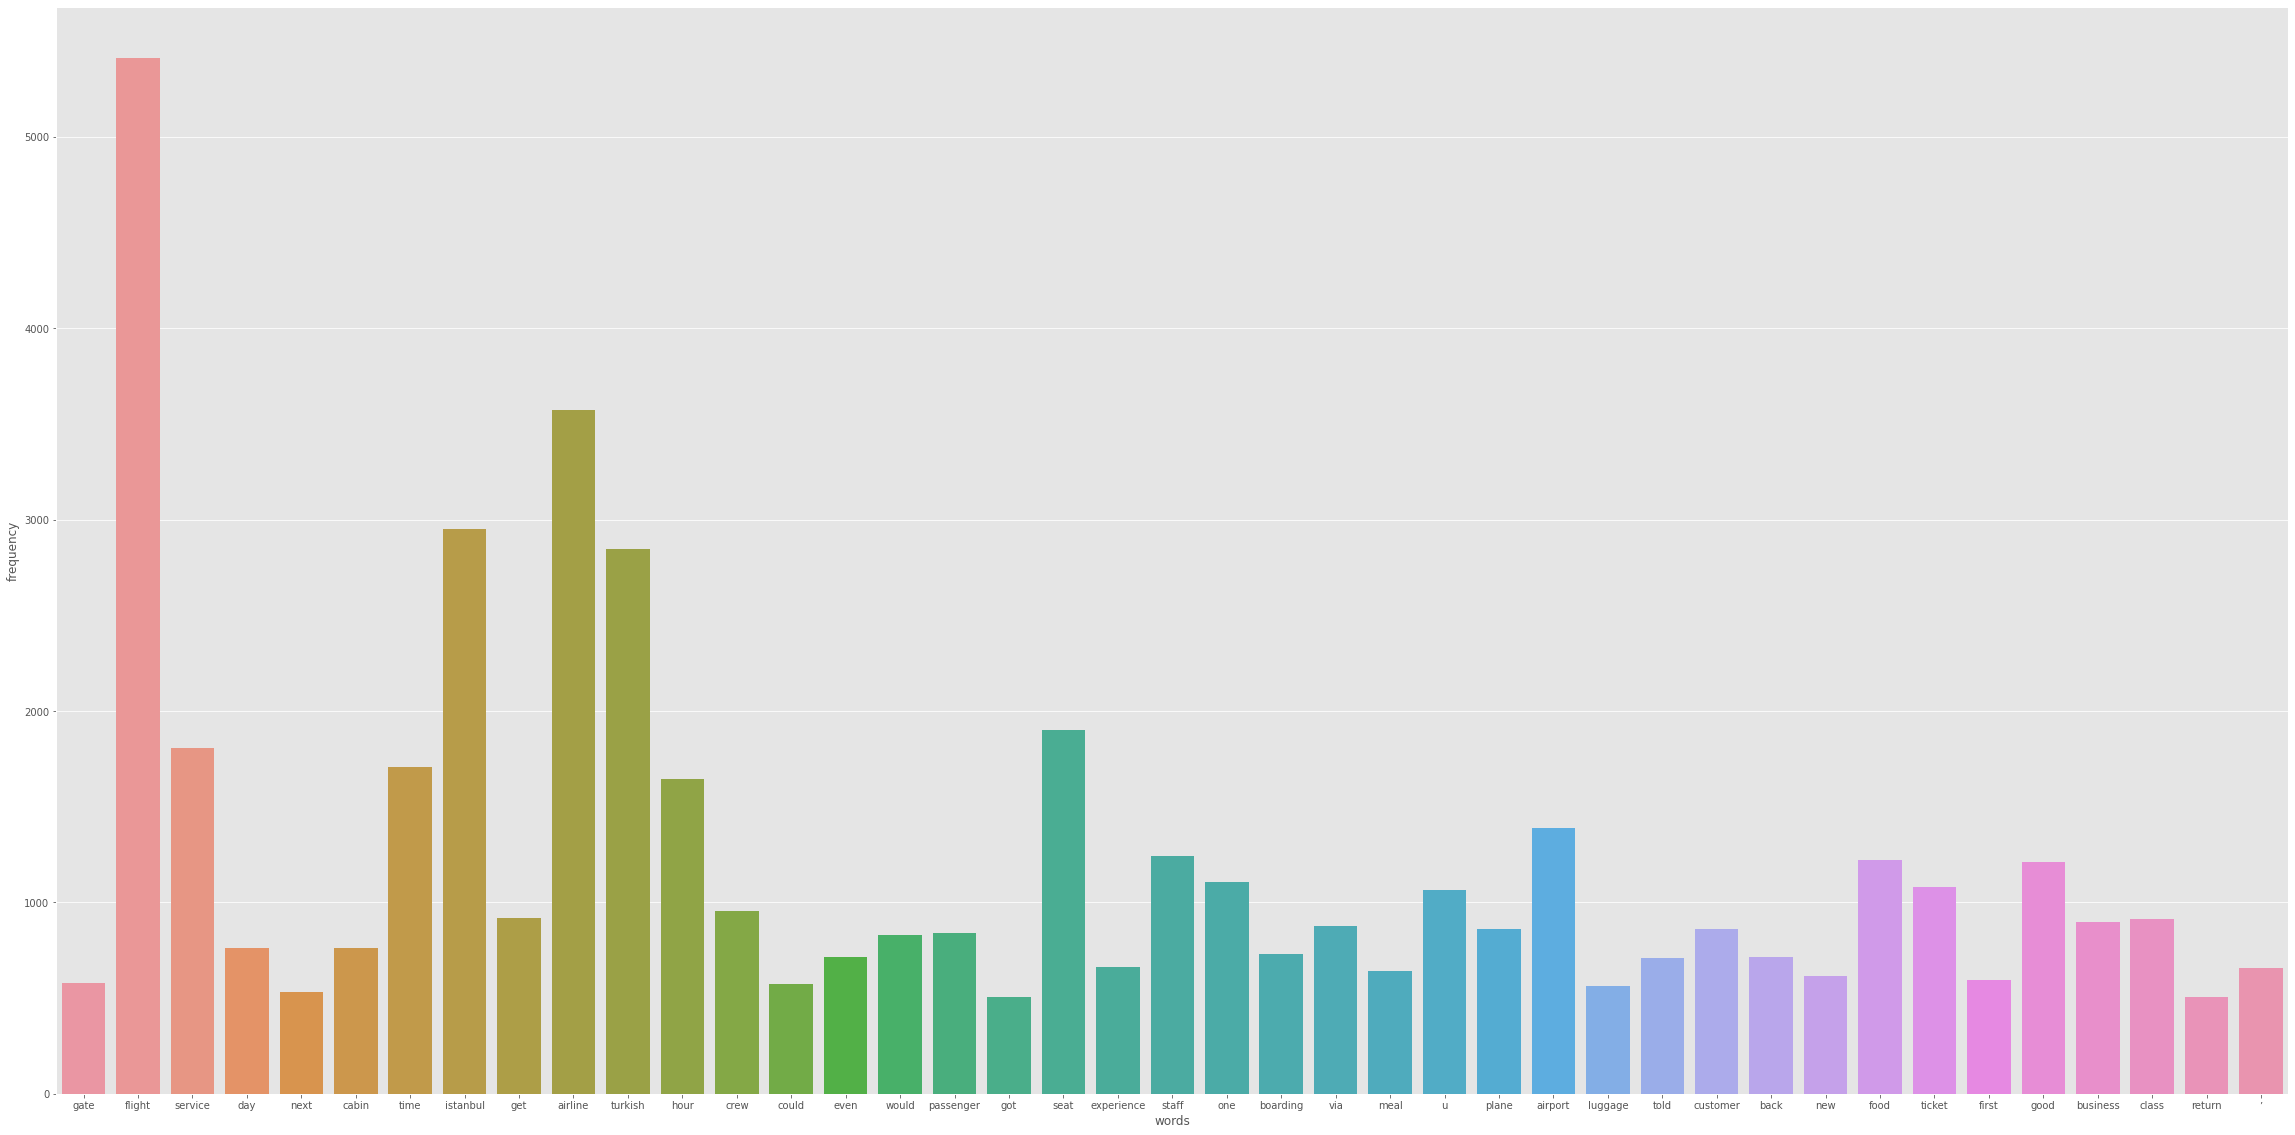

In [ ]:
import seaborn as sns
f = plt.figure(figsize=(40,20))
sns.barplot(x = 'words', y = 'frequency' , data= a)
plt.show();
plt.show();

#### WorldCloud of the words that passed more than fifty time in all text

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
b = freq_word[(freq_word["frequency"] > 50)]
c=str( b['words'])

In [ ]:
wordcloud = WordCloud().generate(c)

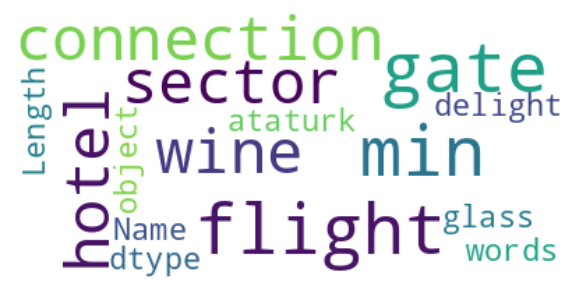

In [ ]:
wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(c)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

####  Worldcloud for all text

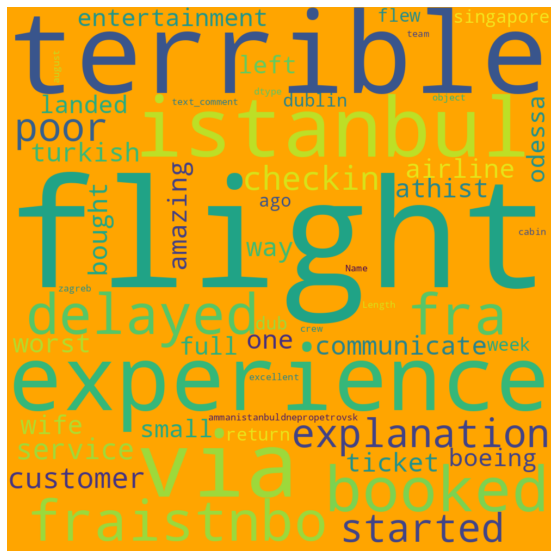

In [ ]:
wordcloud = WordCloud(max_words=1500000000,width = 1000, height = 1000, max_font_size = 1000, 
                     background_color = "orange",  min_font_size = 10).generate(str(df5['text_comment']))
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("ads531proje-comment-wordcloud.png");

In [ ]:
#?wordcloud

###  4- SENTIMENT ANALYSIS WITH VADER AND CLASSIFICATION MODEL TO EVALUATE<a class="anchor" id="VADER"></a>

In [ ]:
#from keras import layers, models, optimizers
#from keras.preprocessing import text, sequence

####  CLASSIFICATION MODEL WITH TFIDF VECTORIZER
**In this part I try conduct a classification model for predicting recommends from comments variables with using TFIDF vectorizer. To pick best classification model firstly I compare most popular classification without adjusting hyperparameter then I pick one of them that gives high R2 score. Following this,to conduct best model,I use Grid searchCV to find best params. After finding them Iconduct a model with the best params and make evaluation with cross validation. Finally I calculate classification report, confusion matrix,ROC curve.**

In [ ]:
X=df5['clean_comment']
y=df5['clean_recommend']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=105)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
def test_pipeline(model):
    pipe=Pipeline([('tfidf',TfidfVectorizer(analyzer='word', encoding='utf-8',stop_words=None,
                                 use_idf=True, tokenizer=None, lowercase=False, input='content',ngram_range=(1,1))),('model',model)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    precision,recall,fscore,support=score(y_test, y_pred, average='weighted')
    print('Precision : {}'.format(precision))
    print('Recall    : {}'.format(recall))
    print('F-score   : {}'.format(fscore))
    print('Support   : {}'.format(support))

In [ ]:
test_pipeline(MultinomialNB())

Accuracy Score:  0.727427597955707
Precision : 0.6886891434696876
Recall    : 0.727427597955707
F-score   : 0.6805946070262174
Support   : None


In [ ]:
test_pipeline(LogisticRegression())

Accuracy Score:  0.807495741056218
Precision : 0.7386763207057221
Recall    : 0.807495741056218
F-score   : 0.770451212975323
Support   : None


In [ ]:
test_pipeline(RandomForestClassifier())

Accuracy Score:  0.797274275979557
Precision : 0.7290391224624485
Recall    : 0.797274275979557
F-score   : 0.7604405372069152
Support   : None


In [ ]:
test_pipeline(DecisionTreeClassifier())

Accuracy Score:  0.7086882453151618
Precision : 0.7100584009294135
Recall    : 0.7086882453151618
F-score   : 0.7093722772019715
Support   : None


In [ ]:
test_pipeline(AdaBoostClassifier())

Accuracy Score:  0.6780238500851788
Precision : 0.6216314853916228
Recall    : 0.6780238500851788
F-score   : 0.638691517078434
Support   : None


RESULT= As it can be seen above, We used TFİDF Vectorizer and  found the best fitted model for our analysis is Logistic Regression because it has very good perfomance on data that modeled for a few categories. 

#### APPLYING VADER SENTIMENT ANALYSIS TO COMMENT AND RECOMMEND <a class="anchor" id="Vader-sentimental-analysis"></a>
   - VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

####  Defining positive,negative and neutral boundiries for comment and recommend

In [ ]:
#define negative ,positive and netrual boundiries for comment
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sia.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df5["vader_prediction"] = df5['clean_comment'].apply(predict_sentiment)

# Show 5 random rows of the data
df5.sample(5)

,subheader,recommend1,clean_header,clean_comment,clean_recommend,clean_homeland,clean_name,clean_date,final_comment,final_header,text_comment,comment_words_number,text_header,vader_prediction
167,Frederik Tinsfeldt (Denmark) 18th August 2022,Type Of Traveller Solo Leisure\nSeat Type Econ...,i was not able to get my seat,the day before my turkish airlines flight on t...,no,denmark,frederik tinsfeldt,18th august 2022,day turkish airline flight august purchased up...,able get seat,"[day, turkish, airline, flight, august, purcha...",130,"[able, get, seat]",negative
1254,Danny Tzur (Israel) 6th November 2017,Aircraft A321 / A330\nType Of Traveller Solo L...,took them hours to serve dinner,review tel aviv to bangkok via istanbul the fi...,hi we are sorry to hear about the dissatisfact...,israel,danny tzur,6th november 2017,review tel aviv bangkok via istanbul first leg...,took hour serve dinner,"[review, tel, aviv, bangkok, via, istanbul, fi...",49,"[took, hour, serve, dinner]",negative
352,A Graham (United States) 2nd December 2021,Aircraft Boeing 787\nType Of Traveller Solo Le...,please avoid turkish airlines,it is obvious that this at some point in the p...,no,states,a graham united,2nd december 2021,obvious point past good company gone wrong dir...,please avoid turkish airline,"[obvious, point, past, good, company, gone, wr...",118,"[please, avoid, turkish, airline]",positive
313,Anne Roberts (United States) 11th January 2022,Type Of Traveller Couple Leisure\nSeat Type Ec...,i’m extremely disappointed,not turkish airlines refused to correct the or...,no,states,anne roberts united,11th january 2022,turkish airline refused correct order first mi...,i’m extremely disappointed,"[turkish, airline, refused, correct, order, fi...",60,"[i, ’, m, extremely, disappointed]",negative
902,Oscar Marcheggiani (Italy) 13th March 2019,Aircraft A330\nType Of Traveller Business\nSea...,flight had been cancelled,hanoi to milano via istanbul as we arrived thi...,no,italy,oscar marcheggiani,13th march 2019,hanoi milano via istanbul arrived morning hano...,flight cancelled,"[hanoi, milano, via, istanbul, arrived, mornin...",72,"[flight, cancelled]",positive


In [ ]:
df5['vader_numeric']=df5['vader_prediction'].map({'neutral':0,'positive':1,'negative':-1})
df5['recommend_numeric']=df5['clean_recommend'].map({' yes':1,' no':0}) 

####  Plotting frequency of recommend Vader analysis

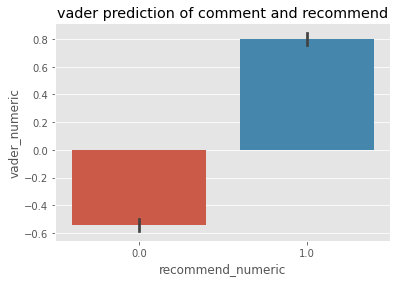

In [ ]:
import seaborn as sns
ax = sns.barplot(data=df5, x='recommend_numeric', y='vader_numeric')
ax.set_title('vader prediction of comment and recommend')
plt.show()

#### Plotting frequency of comment Vader analysis

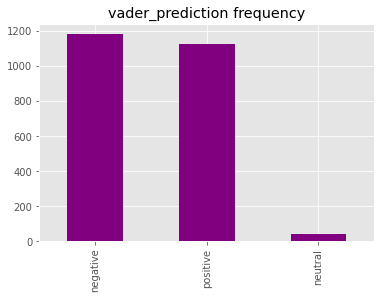

In [ ]:
df5['vader_prediction'].value_counts().plot.bar(color='purple').set_title("vader_prediction frequency");

In [ ]:
df5['vader_prediction']

0       negative
1        neutral
2       positive
3       positive
4       negative
          ...   
2343    positive
2344    positive
2345    positive
2346    positive
2347    positive
Name: vader_prediction, Length: 2348, dtype: object

####  MODEL SELECTION FOR COMMENT AND VADER PREDICTION

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', encoding='utf-8',stop_words=None,
                                 use_idf=True, tokenizer=None, lowercase=False, input='content',ngram_range=(1,1))

In [ ]:
comment_str=df5['clean_comment'].apply(str)

tfidf_comment= vectorizer.fit_transform(comment_str)

print(tfidf_comment.shape)


(2348, 10817)


In [ ]:
comment_idf=vectorizer.idf_
comment_idf

array([7.6631327 , 7.15230707, 6.19679563, ..., 8.0685978 , 8.0685978 ,
       8.0685978 ])

In [ ]:
comment_array= tfidf_comment.toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X=comment_array
y=df5['vader_prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Mult.Naive Bayes" : MultinomialNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Ada Boost": AdaBoostClassifier(),}

def fit_and_score(models, X_train, X_test, y_train, y_test):
 
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'KNN': 0.7404255319148936,
 'Logistic Regression': 0.8531914893617021,
 'Mult.Naive Bayes': 0.8340425531914893,
 'Decision Tree': 0.7595744680851064,
 'Random Forest': 0.851063829787234,
 'Ada Boost': 0.7936170212765957}

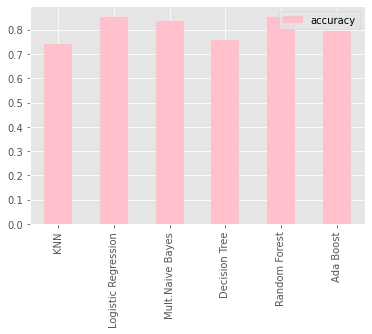

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar( color='pink');


RESULT= As a result of bar plot, we can see the best models are Logistic Regression and Random Forest. Therefore we pick Random Forest and try to improve it with GridSearchCV to obtain better scores.

####  RANDOM FOREST FOR VADER SENTIMENT ANALYSIS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comment_array, df5['vader_prediction'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=42)


In [ ]:
param_grid = {'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8,10],
    'criterion' :['gini', 'entropy']}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 500, 1000]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(**CV_rfc.best_params_)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200)

In [ ]:
y_pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.825531914893617


In [ ]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84       248
     neutral       0.00      0.00      0.00         7
    positive       0.81      0.84      0.82       215

    accuracy                           0.83       470
   macro avg       0.55      0.56      0.55       470
weighted avg       0.81      0.83      0.82       470

0.825531914893617


**NOTE= According to our classification report's result;**
**Precision score= We say negative comment and  it become true for 0.73 of negative comment , we say positive comment and it become true for 0.82 of positive comment**
**Recall= We predict positively 0.77 of negative comment, 0.81 of positive comment and 0.20 of negative comment**
**Accuracy score is 0.78 which means  from our predictions 0.78 of them is right.** 

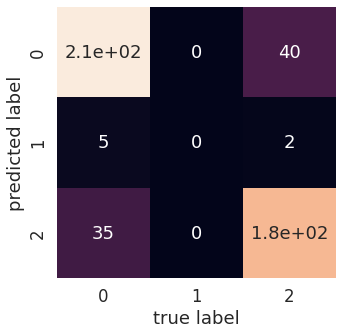

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

**RESULT= As we can see confusion matrix, In our model there are 210+2+46=309 positive comment that we predict 210 of them true, 2 of them are predicted as neutral and 46 of them are predicted as negative.**

**There are 150+6+49 negative comment that we predict 150 of them as true, 6 of them are predicted as neutral and 49 of them are predicted as positive.**

**There are 2+2=4 neutral comment that we predict 2 of them true and 2 of them as positive.**

### 5-SENTIMENTAL ANALYSIS WITH BERT AND  CLASSIFICATION MODELS TO EVALUATE<a class="anchor" id="BERT"></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.11.0
Hub version: 0.13.0
GPU available (YESS!!!!)


In [ ]:
#!pip install transformers

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFAutoModelForSequenceClassification,Trainer
import torch
import re
from transformers import AutoTokenizer, Trainer, TrainingArguments, AutoModelForSequenceClassification, DataCollatorWithPadding,TFAutoModel
import torch.nn.functional as F

### DISTELBERT MODEL FOR FINDING LABELS AS NEGATIVE OR POSITIVE
In this model I will try to find which customer did negative or positive comment according to their headers of comments. I will use distilbert-base-uncased model from Hugging face ( pytorch version)



In [ ]:
# loading our model and define for usage
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model_name="distilbert-base-uncased-finetuned-sst-2-english"

In [ ]:
# define our sentiment classifier with model
classifier=pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)

In [ ]:
#Let's try our tokenizer with a sentence
tokens=tokenizer.tokenize('I am happy to see you and we will continue exercise')
print(tokens)

['i', 'am', 'happy', 'to', 'see', 'you', 'and', 'we', 'will', 'continue', 'exercise']


In [ ]:
token_ids=tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)

[1045, 2572, 3407, 2000, 2156, 2017, 1998, 2057, 2097, 3613, 6912]


In [ ]:
input_ids=tokenizer('I am happy to see you and we will continue exercise')
print(input_ids)

{'input_ids': [101, 1045, 2572, 3407, 2000, 2156, 2017, 1998, 2057, 2097, 3613, 6912, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#Tokenize our header dataframe
batch=tokenizer(list(df5['clean_header']),padding=True,truncation=True, return_tensors='pt')

In [ ]:
with torch.no_grad():
  outputs=model(**batch)

  predictions=F.softmax(outputs.logits,dim=1)
  print(predictions)
  labels=torch.argmax(predictions, dim=1)
  labels=[model.config.id2label[label_id] for label_id in labels.tolist()]

tensor([[9.9980e-01, 1.9986e-04],
        [9.9875e-01, 1.2522e-03],
        [9.9958e-01, 4.2107e-04],
        ...,
        [6.7574e-01, 3.2426e-01],
        [6.7574e-01, 3.2426e-01],
        [6.7574e-01, 3.2426e-01]])


In [ ]:
# Adding layers into our dataset
df5['labels']=labels

In [ ]:
df5.head()

,subheader,recommend1,clean_header,clean_comment,clean_recommend,clean_homeland,clean_name,clean_date,final_comment,final_header,labels
0,Arthur van Eerden (Germany) 3rd December 2022,Aircraft A321/A330/B777\nType Of Traveller Sol...,poor inflight product and service,booked fraistnbo delayed out of fra with no ex...,no,germany,arthur van eerden,3rd december 2022,booked fraistnbo delayed fra explanation cabin...,poor inflight product service,NEGATIVE
1,A Keane (United Kingdom) 30th November 2022,Type Of Traveller Solo Leisure\nSeat Type Econ...,avoid flying with this airline in future,terrible experience started with a very poor c...,no,kingdom,a keane united,30th november 2022,terrible experience started poor checkin exper...,avoid flying airline future,NEGATIVE
2,L Sharnova (United States) 30th November 2022,Type Of Traveller Couple Leisure\nSeat Type Ec...,customer service is terrible,the customer service is terrible they communic...,no,states,l sharnova united,30th november 2022,customer service terrible communicate via feed...,customer service terrible,NEGATIVE
3,Jimmy Coley (United Kingdom) 29th November 2022,Aircraft Boeing 777-300\nType Of Traveller Cou...,nice food in economy,not had and amazing flight with turkish airlin...,yes,kingdom,jimmy coley united,29th november 2022,amazing flight turkish airline one way ticket ...,nice food economy,POSITIVE
4,Tair Sharipov (United States) 29th November 2022,Type Of Traveller Family Leisure\nSeat Type Ec...,it was the worst experience,it was the worst experience that i ever had i ...,no,states,tair sharipov united,29th november 2022,worst experience ever bought ticket wife month...,worst experience,NEGATIVE


### COMPARE RECOMMEND AND LABELS WITH MACHINE LEARNING
In our dataset customer give recommends to other customers about using Turkish Airlines. I will compare recommend and labels that were produced with Distelbert model above and make evaluations about our model according to their recommends.

In [ ]:
# Convert to integer we use ne hot encoding for recommend which consist of yes and no; labels which consists of negative and positive
X=df5['clean_recommend']
y=df5['labels']
X_onehot = pd.get_dummies(X, drop_first=True)
y_onehot=pd.get_dummies(y,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y_onehot, test_size = 0.2, random_state = 0, shuffle = True)
print(len(X_train))
print(y_train.shape)

1878
(1878, 1)


In [ ]:
# Put models in a dictionary
import numpy as np
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Mult.Naive Bayes" : MultinomialNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Ada Boost": AdaBoostClassifier(),}

def fit_and_score(models, X_train, X_test, y_train, y_test):
 
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'KNN': 0.7638297872340426,
 'Logistic Regression': 0.7723404255319148,
 'Mult.Naive Bayes': 0.7723404255319148,
 'Decision Tree': 0.7723404255319148,
 'Random Forest': 0.7723404255319148,
 'Ada Boost': 0.7723404255319148}

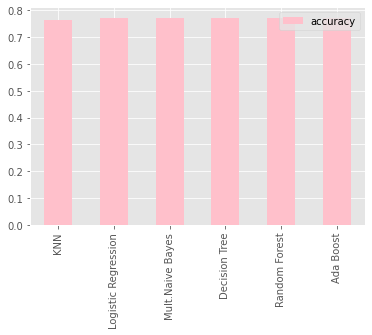

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar( color='pink');

NOTE= As we can see Random Forest, Naive Bayes, Decision Tree, Logistic Regression gave same and best result so I will apply Random Forest for showing how we can tune a model with Grid Search CV.

#### RANDOM FOREST FOR  BERT ANALYSIS

In [ ]:
rf_gs =RandomForestClassifier()

param_grid = {'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8,10],
    'criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rf_gs, param_grid, n_jobs=-1, cv=5)
clf.fit(x_train, y_train) # X is train samples and y is the corresponding labels


print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
# run the model which has the best scores
classifier =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 200).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

precision, recall, f1score, support = score(y_test, y_pred, average='micro')
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print (accuracy)
print (precision, recall, f1score)

77.23
0.7723404255319148 0.7723404255319148 0.7723404255319148


NOTE=We get 0.77 score from Grid Search CV which is not so good.

### 6- EMOTION ANALYSIS WITH DISTILBERT<a class="anchor" id="EMOTION"></a>
As we know Huggingface include lots of different type of sentiment analysis. I will use "j-hartmann/emotion-english-distilroberta-base" model fro customer emotion according to their comment


In [ ]:
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
# load tokenizer and model, create trainer
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

In [ ]:
pred_texts = df5['clean_comment'].dropna().astype('str').tolist()

In [ ]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [ ]:
# Run predictions
predictions = trainer.predict(pred_dataset)

In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
# scores raw
temp = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True))

In [ ]:
# work in progress
# container
anger = []
disgust = []
fear = []
joy = []
neutral = []
sadness = []
surprise = []

# extract scores (as many entries as exist in pred_texts)
for i in range(len(pred_texts)):
  anger.append(temp[i][0])
  disgust.append(temp[i][1])
  fear.append(temp[i][2])
  joy.append(temp[i][3])
  neutral.append(temp[i][4])
  sadness.append(temp[i][5])
  surprise.append(temp[i][6])

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(pred_texts,preds,labels,scores,  anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['text','pred','label','score', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
df.head()

,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,booked fraistnbo delayed out of fra with no ex...,5,sadness,0.433276,0.225185,0.004254,0.013788,0.015513,0.219922,0.433276,0.088062
1,terrible experience started with a very poor c...,2,fear,0.912544,0.005007,0.009130,0.912544,0.001491,0.008141,0.010997,0.052690
2,the customer service is terrible they communic...,0,anger,0.334558,0.334558,0.049490,0.246063,0.002560,0.009568,0.331922,0.025839
3,not had and amazing flight with turkish airlin...,3,joy,0.765208,0.002382,0.000312,0.001847,0.765208,0.022034,0.071348,0.136870
4,it was the worst experience that i ever had i ...,0,anger,0.975028,0.975028,0.001733,0.002623,0.002651,0.001734,0.011995,0.004235


<Axes: xlabel='label', ylabel='count'>

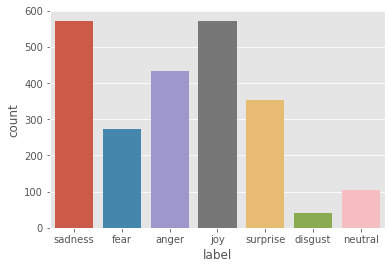

In [ ]:
import seaborn as sns
sns.countplot(x=df["label"])

NOTE= As it is seen above countplot, sadness and joy are the most seen according to our model prediciton

In [ ]:
#saving dataframe as csv 
df.to_csv("ads-531-sentiment.csv" )

### 7- REFERENCES<a class="anchor" id="REFERENCES"></a>

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d

https://www.statology.org/shapiro-wilk-test-python/

https://huggingface.co/assemblyai/distilbert-base-uncased-sst2

https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/

https://scikit-learn.org/stable/